# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# install pyreadstat
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.9 MB/s 


# Import Datasets

In [3]:
df = pd.read_spss('/content/drive/MyDrive/Project Portfolio/Students Math Score/1ResearchProjectData.sav')
df.head(10)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith
5,6.0,Ruger,Male,Caucasian,Paid lunch,58.0,Ruger_Smith
6,7.0,Ruger,Female,African-American,Paid lunch,62.0,Ruger_Smith
7,8.0,Ruger,Male,Hispanic,Free lunch,40.0,Ruger_Smith
8,9.0,Ruger,Female,African-American,Free lunch,82.0,Ruger_Smith
9,10.0,Ruger,Male,African-American,Paid lunch,78.0,Ruger_Smith


# About Dataset

Dataset ini berisikan data siswa dimata pelajaran matematika, dapat dilihat juga pada data dimana siswa diajar oleh masing-masing guru, gender dari para siswa & berasal dari etnis apa siswa tersebut. Karena sekolah ini beragam secara sosial ekonomi, ada beberapa siswa yang memenuhi syarat untuk mendapatkan makanan gratis atau ada juga siswa yang harus membayar dengan harga yang lebih murah untuk mendapatkan makan siang. Pada data ini dapat dilihat juga nilai matematika siswa dan juga gaya mengajar dari masing-masing guru.

**Just For Information:** 

Terdapat 3 guru yang mengajar yaitu Ms.Ruger, Ms.Smith & Ms.Wesson. Ms.Ruger seorang wanita muda ber-etnis Afrika-Amerika sudah mengajar matematika selama 3tahun terakhir, Ms.Smith seorang wanita bersertifikat untuk mengajar bahasa Spanyol dan matematika sudah mengajar matematika selama 3tahun terakhir, Ms. Wesson, seorang wanita yang lebih tua dari keduanya dan ditugaskan untuk mengajar matematika selama 3 tahun terakhir.

Pengajaran Matematika dibagi menjadi 3 kelompok/kelas: Ms.Ruger yang ber-etnis Afrika-Amerika dipercayai untuk mengajar kedapa sebagian besar siswa yang ber-etnis Afrika-Amerika, Ms.Smith yang fasih berbahasa Spanyol akan mengajar kepada sebagian besar siswa yang ber-etnis Hispanik & Ms. Wesson akan mengajar siswa yang ber-etnis Kaukasia dan Asia. 

Ms.Wesson mempercayai bahwa gaya/metode pengajaran tradisional lebih baik karena terstruktur, teratur, menghasilkan lingkungan belajar yang tenang. Namun Ms.Ruger & Ms.Smith tidak setuju, mereka mempercayai bahwa gaya/metode pengajaran standards-based lebih baik karena guru memfasilitasi pembelajaran dalam lingkungan konstruktivis dimana siswa mengembangkan, mengeksplorasi, menduga, dan menguji dugaan mereka dalam batas-batas standar, jadi siswa akan lebih aktif dalam pembelajaran.

**Attribute Information**
*   Student - Nama murid yang dirubah menjadi angka (untuk melindungi kerahasiaan)
*   Teacher - Nama guru yang mengajar ( Ms.Ruger, Ms.Smith, Ms.Wesson )
*   Gender - Gender/Jenis kelamin dari para murid (Laki-laki atau Perempuan)
*   Ethnic - Etnis dari masing-masing murid yang sedang diajar
*   Freeredu - Makan siang siswa apakah mendapat Free lunch (Makan siang gratis) atau Paid lunch (Membeli makan siang)
*   Score - Nilai Matematika murid yang diajar
*   wesson - Gaya atau metode pembelajaran yang diberikan, Ruger_Smith (metode standards-based) dan Wesson (metode tradisional / konvensional)


**Sumber:** https://www.kaggle.com/datasets/soumyadiptadas/students-math-score-for-different-teaching-style

# Analysing Dataset

In [6]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


In [4]:
df.shape

(217, 7)

**Observasi:**

*   Setelah dilakukan analysing, data memiliki 7 kolom dengan 217 baris
*   Terdapat 5 kolom yang bertipe data Categorical dan 2 kolom yang bertipe data Numerical



# Data Preparation

## Missing values

In [7]:
df.isnull().sum()

Student     1
Teacher     1
Gender      1
Ethnic      1
Freeredu    1
Score       1
wesson      0
dtype: int64

In [8]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Student,1,0.46
1,Teacher,1,0.46
2,Gender,1,0.46
3,Ethnic,1,0.46
4,Freeredu,1,0.46
5,Score,1,0.46


**Observasi:**

*   Setelah dicek missing value pada data ternyata terdapat beberapa kolom yang mempunyai missing value
*   Karena dilihat dari percentage missing value pada keseluruhan data terbilang kecil, maka missing value tersebut akan didrop

In [9]:
df = df.dropna()
df.head(10)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith
5,6.0,Ruger,Male,Caucasian,Paid lunch,58.0,Ruger_Smith
6,7.0,Ruger,Female,African-American,Paid lunch,62.0,Ruger_Smith
7,8.0,Ruger,Male,Hispanic,Free lunch,40.0,Ruger_Smith
8,9.0,Ruger,Female,African-American,Free lunch,82.0,Ruger_Smith
9,10.0,Ruger,Male,African-American,Paid lunch,78.0,Ruger_Smith


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
dtypes: category(5), float64(2)
memory usage: 6.8 KB


**Observasi:**

*   Setelah missing value didrop ternyata ada perubahan dibagian barisnya
*   Baris yang awalnya 217 setelah didrop baris tersebut berkurang menjadi 216 baris

## Duplicated values

In [11]:
df.duplicated().sum()

0

**Observasi:**

*   Tidak terdapatduplicate value pada data

# Exploratory Data Analysis (EDA)

In [12]:
df.head(5)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
dtypes: category(5), float64(2)
memory usage: 6.8 KB


## Statistical summary of columns 

In [14]:
categoricals = ['Teacher',	'Gender',	'Ethnic',	'Freeredu',	'wesson']

numericals = ['Score', 'Student']

**Bedasarkan kolom yang tersedia, akan lebih mudah untuk dianalisa apabila kolom tersebut dikategorikan menjadi sebagai berikut:**
* Numerical berisikan kolom dengan tipe data numeric saja
* Categorical berisikan kolom dengan tipe selain numeric, seperti nama, kata-kata, dll
* `Teacher` berisikan kolom mengenai siapakah guru yang mengajar
* `Gender` berisikan gender dari para siswa apakah siswa tersebut laki-laki atau perempuan
* `Ethnic` berisikan etnis dari siswa tersebut 
* `Freeredu` berisikan apakah siswa tersebut membeli makan siang atau apakah siswa tersebut mendapatkan makan siang dari sekolah
* `wesson` berisikan cara mengajar guru tersebut

In [15]:
# numerical statistical sumary
df[numericals].describe()

,Score,Student
count,216.000000,216.000
mean,65.273148,108.500
std,16.361453,62.498
min,30.000000,1.000
25%,53.000000,54.750
50%,65.000000,108.500
75%,79.000000,162.250
max,95.000000,216.000


**Observasi:**  
*   Dibagian min dan max masih make sense karena tidak ada nilai yang aneh dikeduanya (misal tertukar)
*   Dibagian min dan max pada kolom `Student` dicurigai berisi no absen siswa atau no urutan siswa saja
*   Mean ~ 50% (Median) pada `Score` & `Student` simetrik, nilai tidak berbeda jauh
* Mean > 50% (Median) tidak ada kolom yang menunjukan memiliki distribusi yang condong positif
* Mean < 50% (Median) tidak ada kolom yang menunjukan memiliki distribusi negatif

In [16]:
# describe method on categorical data
df[categoricals].describe()

,Teacher,Gender,Ethnic,Freeredu,wesson
count,216,216,216,216,216
unique,3,2,4,2,2
top,Wesson,Male,Hispanic,Paid lunch,Ruger_Smith
freq,76,120,66,112,140


In [17]:
#Melihat Unique categoricals
for col in categoricals:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

Teacher 
 count        216
unique         3
top       Wesson
freq          76
Name: Teacher, dtype: object 
 Wesson    76
Ruger     71
Smith     69
Name: Teacher, dtype: int64 

Gender 
 count      216
unique       2
top       Male
freq       120
Name: Gender, dtype: object 
 Male      120
Female     96
Name: Gender, dtype: int64 

Ethnic 
 count          216
unique           4
top       Hispanic
freq            66
Name: Ethnic, dtype: object 
 Hispanic            66
Asian               53
African-American    52
Caucasian           45
Name: Ethnic, dtype: int64 

Freeredu 
 count            216
unique             2
top       Paid lunch
freq             112
Name: Freeredu, dtype: object 
 Paid lunch    112
Free lunch    104
Name: Freeredu, dtype: int64 

wesson 
 count             216
unique              2
top       Ruger_Smith
freq              140
Name: wesson, dtype: object 
 Ruger_Smith    140
Wesson          76
Name: wesson, dtype: int64 



**Observasi:**
*   Pada kolom `Teacher` memiliki 3	unique value yang berisikan nama guru yang mengajar ( Wesson, Ruger, Smith )
*   Pada kolom `Gender`	memiliki 2	unique value yang berisikan Male & Female
*   Pada kolom `Ethnic`	memiliki 4	unique value yang berisikan etnis dari para siswa ( Hispanic, Asian, African-American, Caucasian )
*   Pada kolom `Freeredu`	memiliki 2	unique value yang berisikan apakah siswa tersebut membeli makan siang (Paid lunch) atau apakah siswa tersebut mendapatkan makan siang dari sekolah (Free lunch)
*   Pada kolom `wesson` memiliki 3	unique value yang berisikan gaya cara mengajar yang dipakai oleh 3 guru tsb, Gaya mengajar Ruger_Smith atau Gaya mengajar Wesson

## Univariate Analysis

#####Bar Plot untuk Melihat Score sebagai Target Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


% Score Student are
 68.0    3.70
65.0    3.24
72.0    3.24
53.0    3.24
57.0    2.78
        ... 
92.0    0.46
37.0    0.46
42.0    0.46
38.0    0.46
94.0    0.46
Name: Score, Length: 63, dtype: float64


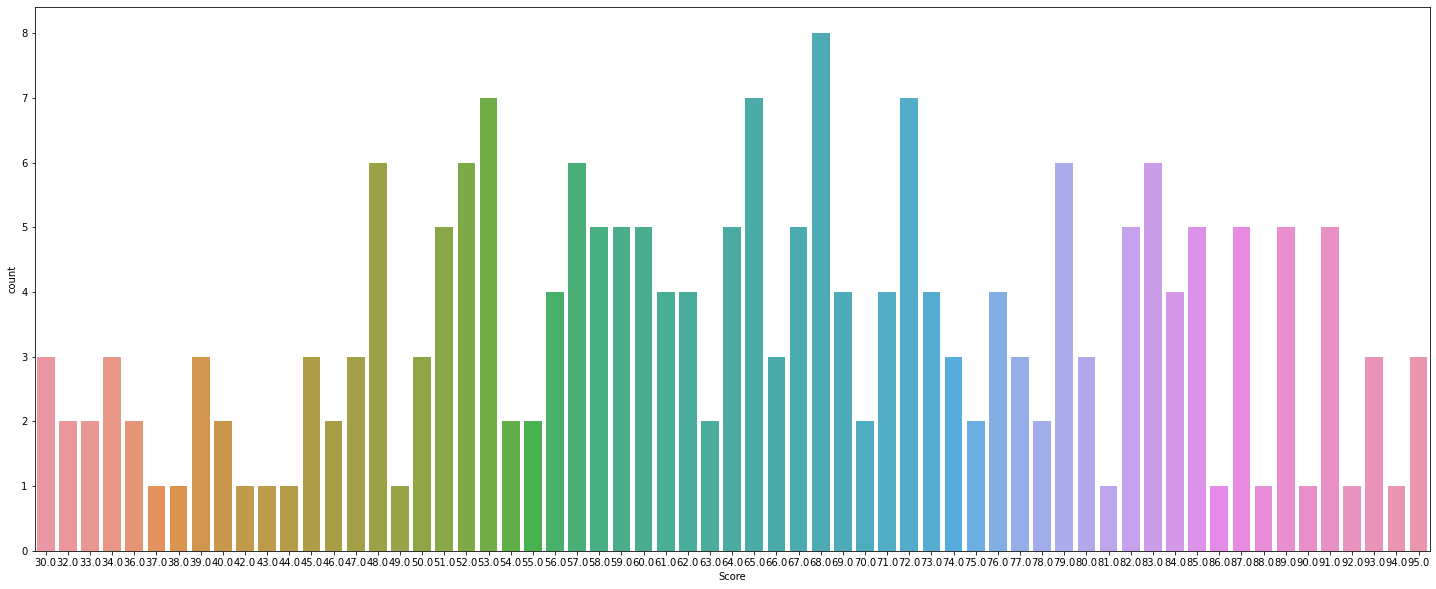

In [18]:
#Membuat Bar Plot
plt.figure(figsize=(25,10))

ChurnBar = sns.countplot(df["Score"])
print("% Score Student are\n", round(df.Score.value_counts() / df.Score.count()*100,2))

**Observasi:**
*   Nilai dari para siswa terlihat bervariasi
*   Nilai terkecil ada dinilai 30 dan nilai terbesar ada dinilai 95
*   Terdapat 8 orang siswa yang mendapatkan nilai 68 

Disini kita belum tahu apakah nilai ini didapat dari gaya mengajar yang mana apakah gaya mengajar Ruger_Smith atau Gaya mengajar Wesson. 

##### Bar Plot untuk Mengetahui Distribusi Data Categorical

Value % of Teacher column
Wesson    35.19
Ruger     32.87
Smith     31.94
Name: Teacher, dtype: float64 

Value % of Gender column
Male      55.56
Female    44.44
Name: Gender, dtype: float64 

Value % of Ethnic column
Hispanic            30.56
Asian               24.54
African-American    24.07
Caucasian           20.83
Name: Ethnic, dtype: float64 

Value % of Freeredu column
Paid lunch    51.85
Free lunch    48.15
Name: Freeredu, dtype: float64 

Value % of wesson column
Ruger_Smith    64.81
Wesson         35.19
Name: wesson, dtype: float64 



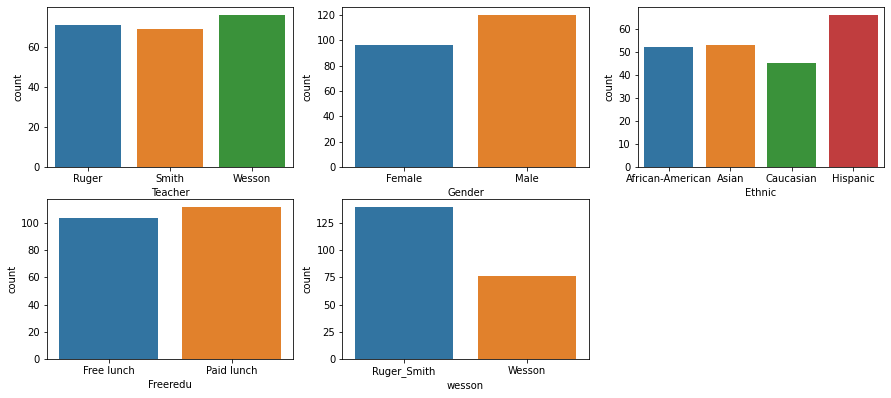

In [19]:
#Memunculkan Percentage untuk categoricals
for col in categoricals:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk categoricals
plt.figure(figsize=(15,10))

for i,col in enumerate(categoricals):    
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col)

In [ ]:
# Test untuk melihat jumlah total siswa dari berbagai categorical
# df. ?? Tinggal diganti dengan categorical yang ingin dicek
test = df.Ethnic.value_counts()
test

Hispanic            66
Asian               53
African-American    52
Caucasian           45
Name: Ethnic, dtype: int64

**Observasi:**
*   Jumlah data siswa laki-laki sebanyak 120 orang dan jumlah siswi perempuan sebenyak 96 orang
*   Persentase jumlah siswa laki-laki sedikit lebih tinggi daripada perempuan, karena 55% populasi pada data adalah laki-laki dan 45% sisanya adalah perempuan
*   Karena Ruger & Smith menggunakan gaya pembelajaran yang sama maka penjelasan mengenai perhitungannya akan digabungkan 
*   Ruger & Smith mengajar 140 murid dan Wesson mengajar 76 murid
*   Bisa kita simpulkan bahwa sebanyak 65% diajar dengan gaya belajaran Ruger_Smith dan 35% sisanya diajar dengan gaya belajar Wesson
*   Sebanyak 104 murid yang mendapatkan Makan siang gratis, dan 112 murid lainnya harus membayar/membeli makan siang
*   Terdapat murid beretnis Hispanic Sebanyak 66 orang, murid beretnis Asian sebanyak 53 orang, murid beretnis African-American sebanyak 52 orang & murid beretnis Caucasian sebanyak 45 orang
*   Murid yang beretnis Hispanic adalah etnis terbanyak dalam pengujian ini dibandingkan dengan etnis yang lain

##### Box Plot untuk Mendeteksi Outlier

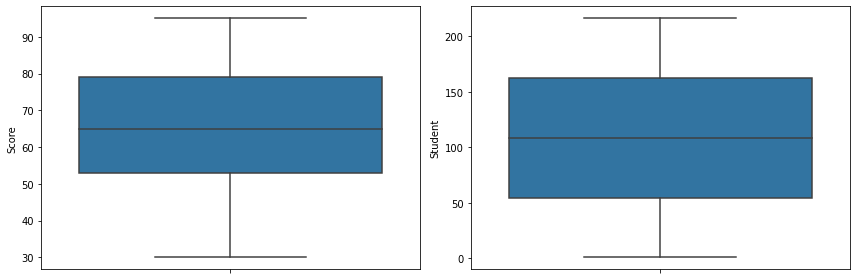

In [20]:
#Membuat Boxplot
plt.figure(figsize=(12,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

**Observasi:**
*   Data tidak memiliki outlier
*   Nilai min, max, median, etc telah disebutkan di atas

##### KDE Plot untuk Mengetahui Distribusi Data Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


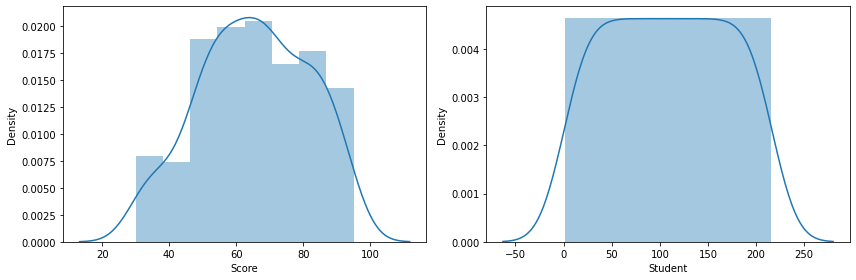

In [21]:
#Membuat KDE Plot
plt.figure(figsize=(12,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

**Observasi:**
*   Dapat dilihat rata-rata terbanyak siswa mendapatkan nilai dikisaran 60
*   Data student hanya no urut perserta

#### What is the student's average score

In [ ]:
df.Score.mean()

65.27314814814815

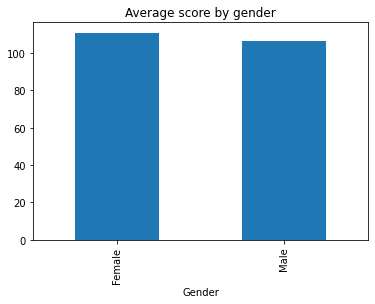

In [ ]:
df.groupby('Gender')['Student'].mean().plot(kind='bar',title = 'Average score by gender')

Text(0.5, 1.0, 'Average score for each ethnic by gender')

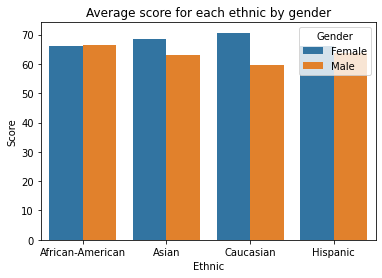

In [ ]:
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Gender', ci = None)
plt.title('Average score for each ethnic by gender')

**Observasi:**
*   Dari keseluruhan data nilai (Score), didapat nilai 65,27 sebagai rata-rata score seluruh siswa
*   Rata-rata nilai/score pada keseluruhan murid, siswi perempuan lebih tinggi dibandingkan dengan siswa laki-laki
*   Rata-rata nilai/score pada keseluruhan etnis, Siswi dari etnis Caucasian mendapatkan rata-rata score tertinggi dari pada etnis lainnya dan dari pada gender lainnya
  

#### The Best Teaching Style

In [ ]:
df.wesson.unique()

['Ruger_Smith', 'Wesson']
Categories (2, object): ['Ruger_Smith', 'Wesson']

In [ ]:
teaching_style_group = df.groupby('wesson')['Score'].mean()
teaching_style_group

wesson
Ruger_Smith    62.335714
Wesson         70.684211
Name: Score, dtype: float64

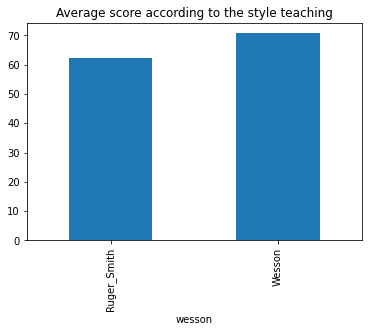

In [ ]:
teaching_style_group.plot(kind = 'bar', title = 'Average score according to the style teaching')

Text(0.5, 1.0, 'Average student scores for each ethnic by style teaching')

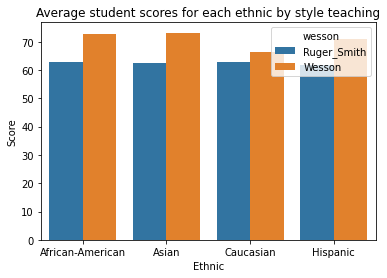

In [ ]:
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'wesson', ci = None)
plt.title('Average student scores for each ethnic by style teaching')

Text(0.5, 1.0, 'Average student scores for each gender by style teaching')

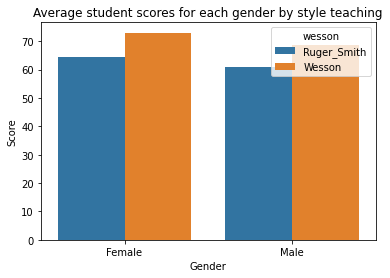

In [ ]:
sns.barplot(data = df, x = 'Gender', y = 'Score', hue = 'wesson', ci = None)
plt.title('Average student scores for each gender by style teaching')

Text(0.5, 1.0, 'Average student scores for each ethnic by Teacher')

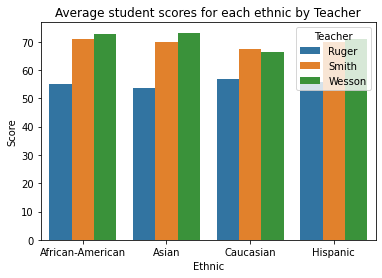

In [ ]:
# Ms.Ruger >> African-American
# Ms.Smith >> Caucasian teach Spanish.
# Ms.Wesson >>  Caucasian.
sns.barplot(data = df, x = 'Ethnic' , y = 'Score', hue = 'Teacher', ci = None)
plt.title('Average student scores for each ethnic by Teacher')

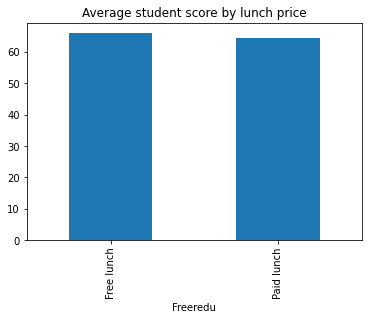

In [ ]:
df.groupby('Freeredu')['Score'].mean().plot(kind = 'bar', title = 'Average student score by lunch price' )

**Observasi:**
*	  Siswa yang mendapatkan makan siang gratis dengan siswa yang harus membayar untuk makan siang, nilai rata-rata dari keduanya tidak berbeda jauh. Artinya walau siswa harus membayar untuk makan siang, itu tidak mempengaruhi nilai mereka
*	   Rata-rata nilai siswa yang diajar dengan 2 metode yang berbeda tidak terlalu jauh berbeda
*    Namun nilai rata-rata siswa yang diajar dengan metode dari Ms.Wesson (tradisional) sedikit lebih tinggi dibandingkan dengan metode yang diusulkan oleh Ms.Ruger dan Ms.Smith (standard-based)
*    Dapat dilihat juga pada berbagai etnis yang diajar, metode dari Ms.Wesson lebih unggul dibandingkan metode yang diusulkan oleh Ms.Ruger dan Ms.Smith
*    Pengajaran Ms.Smith diterima dengan baik oleh siswa yang ber-etnis Caucasian


# Data preprocessing

## Data preproc - Gender

akan dilakukan dengan Label Encode

In [ ]:
df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
# Label Encode gender
df['Gender_encode'] = df['Gender'].astype('category').cat.codes

In [ ]:
# Drop kolom gender yang belum menjadi encode
df = df.drop('Gender', axis=1)
df.head()

,Student,Teacher,Ethnic,Freeredu,Score,wesson,Gender_encode
0,1.0,Ruger,Asian,Free lunch,76.0,Ruger_Smith,0
1,2.0,Ruger,Hispanic,Paid lunch,56.0,Ruger_Smith,0
2,3.0,Ruger,African-American,Free lunch,34.0,Ruger_Smith,0
3,4.0,Ruger,Asian,Paid lunch,59.0,Ruger_Smith,0
4,5.0,Ruger,Hispanic,Free lunch,73.0,Ruger_Smith,1


## Data preproc - Freeredu

akan dilakukan dengan Label Encode

In [ ]:
df['Freeredu'].unique()

['Free lunch', 'Paid lunch']
Categories (2, object): ['Free lunch', 'Paid lunch']

In [ ]:
# Label Encode Freeredu
df['Freeredu_encode'] = df['Freeredu'].astype('category').cat.codes

In [ ]:
# Drop kolom Freeredu yang belum menjadi encode
df = df.drop('Freeredu', axis=1)
df.head()

,Student,Teacher,Ethnic,Score,wesson,Gender_encode,Freeredu_encode
0,1.0,Ruger,Asian,76.0,Ruger_Smith,0,0
1,2.0,Ruger,Hispanic,56.0,Ruger_Smith,0,1
2,3.0,Ruger,African-American,34.0,Ruger_Smith,0,0
3,4.0,Ruger,Asian,59.0,Ruger_Smith,0,1
4,5.0,Ruger,Hispanic,73.0,Ruger_Smith,1,0


## Data preproc - wesson

akan dilakukan dengan Label Encode

In [ ]:
df['wesson'].unique()

['Ruger_Smith', 'Wesson']
Categories (2, object): ['Ruger_Smith', 'Wesson']

In [ ]:
# Label Encode wesson
df['wesson_encode'] = df['wesson'].astype('category').cat.codes

In [ ]:
# Drop kolom wesson yang belum menjadi encode
df = df.drop('wesson', axis=1)
df.head()

,Student,Teacher,Ethnic,Score,Gender_encode,Freeredu_encode,wesson_encode
0,1.0,Ruger,Asian,76.0,0,0,0
1,2.0,Ruger,Hispanic,56.0,0,1,0
2,3.0,Ruger,African-American,34.0,0,0,0
3,4.0,Ruger,Asian,59.0,0,1,0
4,5.0,Ruger,Hispanic,73.0,1,0,0


## Data prepoc - Teacher	

akan dilakukan dengan One Hot Encode

In [ ]:
df['Teacher'].unique()

['Ruger', 'Smith', 'Wesson']
Categories (3, object): ['Ruger', 'Smith', 'Wesson']

In [ ]:
dummies_Teacher = pd.get_dummies(df['Teacher'],prefix='Teacher')
dummies_Teacher.head()

,Teacher_Ruger,Teacher_Smith,Teacher_Wesson
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# Gabungkan data one hot encodenya kedalam data
df = pd.concat([df, dummies_Teacher], axis=1)

In [ ]:
# Drop kolom Teacher yang belum menjadi encode
df = df.drop('Teacher', axis=1)

## Data prepoc - Ethnic

akan dilakukan dengan One Hot Encode

In [ ]:
df['Ethnic'].unique()

['Asian', 'Hispanic', 'African-American', 'Caucasian']
Categories (4, object): ['African-American', 'Asian', 'Caucasian', 'Hispanic']

In [ ]:
dummies_Ethnic = pd.get_dummies(df['Ethnic'],prefix='Ethnic')
dummies_Ethnic.head()

,Ethnic_African-American,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [ ]:
# Gabungkan data one hot encodenya kedalam data
df = pd.concat([df, dummies_Ethnic], axis=1)

In [ ]:
# Drop kolom Ethnic yang belum menjadi encode
df = df.drop('Ethnic', axis=1)

In [ ]:
df.head(5)

,Student,Score,Gender_encode,Freeredu_encode,wesson_encode,Teacher_Ruger,Teacher_Smith,Teacher_Wesson,Ethnic_African-American,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic
0,1.0,76.0,0,0,0,1,0,0,0,1,0,0
1,2.0,56.0,0,1,0,1,0,0,0,0,0,1
2,3.0,34.0,0,0,0,1,0,0,1,0,0,0
3,4.0,59.0,0,1,0,1,0,0,0,1,0,0
4,5.0,73.0,1,0,0,1,0,0,0,0,0,1


## Outlier Handling

In [ ]:
features = list(df)[:-1]

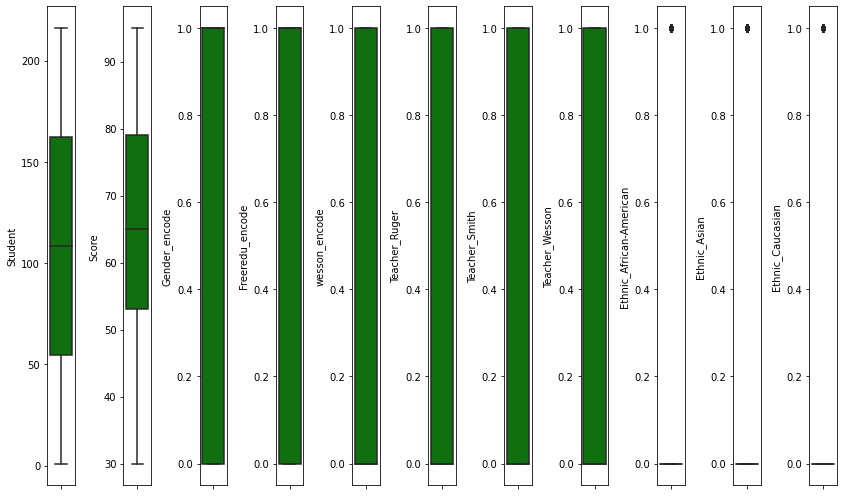

In [ ]:
features = features
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 14, i+1)
    sns.boxplot( y=df[features[i]], color='green' )
    plt.tight_layout()

# Split data: train - validate - test

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Score')
target = df[['Score']]

feature_admit_pretrain, feature_admit_test, target_admit_pretrain, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_admit_train, feature_admit_validation, target_admit_train, target_admit_validation = train_test_split(feature_admit_pretrain, target_admit_pretrain, test_size=0.20, random_state=42)

## Recheck VIF

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,Student,9.228490
2,Gender_encode,1.015113
3,Freeredu_encode,1.140435
4,wesson_encode,inf
5,Teacher_Ruger,inf
6,Teacher_Smith,inf
7,Teacher_Wesson,inf
8,Ethnic_African-American,inf
9,Ethnic_Asian,inf
10,Ethnic_Caucasian,inf


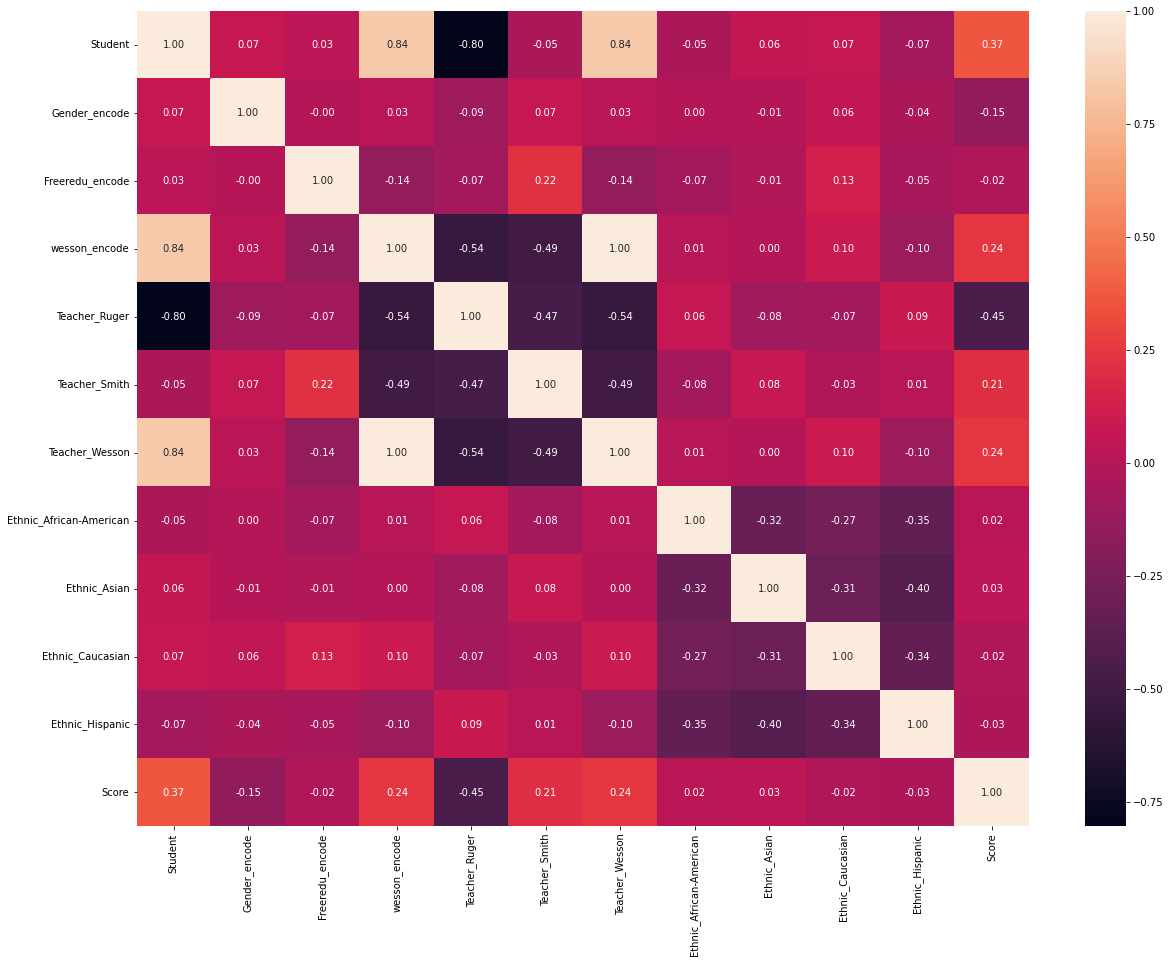

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

## Drop Multicollinear Features

In [ ]:
# drop redundant features
feature_admit_train = feature_admit_train.drop(columns=['Student'])
feature_admit_validation = feature_admit_validation.drop(columns=['Student'])
feature_admit_test = feature_admit_test.drop(columns=['Student'])

In [ ]:
X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,Gender_encode,1.013467
2,Freeredu_encode,1.078327
3,wesson_encode,inf
4,Teacher_Ruger,inf
5,Teacher_Smith,inf
6,Teacher_Wesson,inf
7,Ethnic_African-American,inf
8,Ethnic_Asian,inf
9,Ethnic_Caucasian,inf
10,Ethnic_Hispanic,inf


In [ ]:
# Drop kolom Student karena tidak mempengaruhi pengolahan data
df = df.drop('Student', axis=1)
df.head()

,Score,Gender_encode,Freeredu_encode,wesson_encode,Teacher_Ruger,Teacher_Smith,Teacher_Wesson,Ethnic_African-American,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic
0,76.0,0,0,0,1,0,0,0,1,0,0
1,56.0,0,1,0,1,0,0,0,0,0,1
2,34.0,0,0,0,1,0,0,1,0,0,0
3,59.0,0,1,0,1,0,0,0,1,0,0
4,73.0,1,0,0,1,0,0,0,0,0,1


# Choose the best lambda from Hyperparameter Tuning

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

In [ ]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df.drop(columns='Score').to_numpy()
y = df[['Score']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [ ]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# the complete results
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001086,0.000244,0.000446,0.000102,0.000001,{'alpha': 1e-06},-15.234416,-15.562058,-14.245090,-16.946334,-13.182418,-15.034063,1.267025,9
1,0.001143,0.000160,0.000555,0.000117,0.00001,{'alpha': 1e-05},-15.234416,-15.562057,-14.245090,-16.946333,-13.182418,-15.034063,1.267025,8
2,0.000731,0.000128,0.000287,0.000009,0.0001,{'alpha': 0.0001},-15.234415,-15.562054,-14.245091,-16.946330,-13.182418,-15.034062,1.267024,7
3,0.000613,0.000010,0.000269,0.000011,0.001,{'alpha': 0.001},-15.234415,-15.562018,-14.245100,-16.946290,-13.182417,-15.034048,1.267008,6
4,0.000807,0.000220,0.000403,0.000113,0.01,{'alpha': 0.01},-15.234413,-15.561665,-14.245194,-16.945896,-13.182409,-15.033916,1.266850,5
5,0.000847,0.000168,0.000408,0.000075,0.1,{'alpha': 0.1},-15.234412,-15.558159,-14.246141,-16.941978,-13.182339,-15.032606,1.265279,4
6,0.000619,0.000028,0.000270,0.000016,1,{'alpha': 1},-15.236056,-15.525419,-14.256442,-16.904690,-13.182574,-15.021036,1.250067,3
7,0.000600,0.000014,0.000270,0.000008,5,{'alpha': 5},-15.269897,-15.421384,-14.315684,-16.773649,-13.200085,-14.996140,1.191986,1
8,0.000602,0.000006,0.000272,0.000014,10,{'alpha': 10},-15.344229,-15.355493,-14.405770,-16.666390,-13.245888,-15.003554,1.135929,2
9,0.000596,0.000009,0.000266,0.000009,20,{'alpha': 20},-15.517681,-15.329858,-14.594590,-16.556689,-13.369174,-15.073598,1.058012,10


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-15.034063,9
1,{'alpha': 1e-05},-15.034063,8
2,{'alpha': 0.0001},-15.034062,7
3,{'alpha': 0.001},-15.034048,6
4,{'alpha': 0.01},-15.033916,5
5,{'alpha': 0.1},-15.032606,4
6,{'alpha': 1},-15.021036,3
7,{'alpha': 5},-14.996140,1
8,{'alpha': 10},-15.003554,2
9,{'alpha': 20},-15.073598,10


### Best Model Ridge

In [ ]:
# show as a nice dataframe

coef_df = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Score').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,67.593838
1,Gender_encode,-5.036666
2,Freeredu_encode,-1.159934
3,wesson_encode,2.700358
4,Teacher_Ruger,-8.542209
5,Teacher_Smith,5.841851
6,Teacher_Wesson,2.700358
7,Ethnic_African-American,1.599502
8,Ethnic_Asian,-0.671412
9,Ethnic_Caucasian,-1.003517


## LASSO

In [ ]:
# the same thing, but we use Lasso
from sklearn.linear_model import Lasso

# somehow need to enlarge max_iter values
lasso_reg = Lasso(max_iter=10000, random_state=42)

In [ ]:
# DO THE REST
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.065e+03, tolerance: 3.624e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+03, tolerance: 3.707e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# cv_result
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-15.034062,6
1,{'alpha': 1e-05},-15.034057,5
2,{'alpha': 0.0001},-15.034004,4
3,{'alpha': 0.001},-15.033309,3
4,{'alpha': 0.01},-15.026564,2
5,{'alpha': 0.1},-14.974762,1
6,{'alpha': 1},-15.112453,7
7,{'alpha': 5},-16.591255,8
8,{'alpha': 10},-16.591255,8
9,{'alpha': 20},-16.591255,8


### Best Model LASSO

In [ ]:
# coef_df
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Score').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,72.862498
1,Gender_encode,-5.262195
2,Freeredu_encode,-0.929357
3,wesson_encode,0.000000
4,Teacher_Ruger,-14.552989
5,Teacher_Smith,0.387422
6,Teacher_Wesson,0.000000
7,Ethnic_African-American,1.738385
8,Ethnic_Asian,-0.013853
9,Ethnic_Caucasian,-0.341696


# Evaluate the best models on the test data 

## Model Evaluation Ridge

In [ ]:
# show as a nice dataframe

coef_df = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Score').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,67.593838
1,Gender_encode,-5.036666
2,Freeredu_encode,-1.159934
3,wesson_encode,2.700358
4,Teacher_Ruger,-8.542209
5,Teacher_Smith,5.841851
6,Teacher_Wesson,2.700358
7,Ethnic_African-American,1.599502
8,Ethnic_Asian,-0.671412
9,Ethnic_Caucasian,-1.003517


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_reg_gridcv.best_estimator_.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))

R-squared for training data is -3.470193709679709


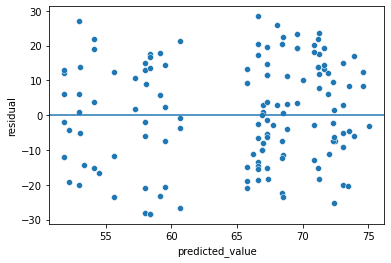

In [ ]:
# calculate residuals
residual = y_admit_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_reg_gridcv.best_estimator_.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_admit_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_admit_train)))

RMSE for training data is 14.606069214677865
MAE for training data is 12.548761199723247
MAPE for training data is 0.1963540545478659


### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = ridge_reg_gridcv.best_estimator_.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_admit_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_admit_test)))

RMSE for testing data is 14.824410355155594
MAE for testing data is 13.09318968276182
MAPE for testing data is 0.19853921715462838


## Model Evaluation LASSO

In [ ]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Score').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,72.862498
1,Gender_encode,-5.262195
2,Freeredu_encode,-0.929357
3,wesson_encode,0.000000
4,Teacher_Ruger,-14.552989
5,Teacher_Smith,0.387422
6,Teacher_Wesson,0.000000
7,Ethnic_African-American,1.738385
8,Ethnic_Asian,-0.013853
9,Ethnic_Caucasian,-0.341696


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_reg_gridcv.best_estimator_.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))

R-squared for training data is -3.101986629466876


### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_reg_gridcv.best_estimator_.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_admit_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_admit_train)))

RMSE for training data is 14.5830208022567
MAE for training data is 12.5525523045504
MAPE for training data is 0.19664299675881375


### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = lasso_reg_gridcv.best_estimator_.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_admit_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_admit_test)))

RMSE for testing data is 14.84245307442079
MAE for testing data is 13.127567049919755
MAPE for testing data is 0.19911153310985705
